# Working with dates

Working with dates and times can sometimes be tricky. Here we work through a few simple examples of how to work with dates and times in Python and Pandas. For more information on working with dates in Pandas, see the [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/timeseries.html)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns



In [16]:
from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)



Let's start by importing data on daily Norwegian electricity prices

In [14]:
elpricesDF = pd.read_csv("http://jmaurit.github.io/anv_statistikk/data/elprices_dailyDF.csv")

We can look at the data and see that it consists of a date variable, a variable for zone (Norway is divided up into 5 price zones that can experience different), and a price variable ("EURperMWH")

In [22]:
elpricesDF.head(10)

,date,zone,EURperMWH
0,2020-01-01,NO1,30.936250
1,2020-01-01,NO2,30.936250
2,2020-01-01,NO3,27.736667
3,2020-01-01,NO4,27.736667
4,2020-01-01,NO5,30.936250
5,2020-01-02,NO1,16.157500
6,2020-01-02,NO2,16.157500
7,2020-01-02,NO3,15.720833
8,2020-01-02,NO4,14.816250
9,2020-01-02,NO5,16.157500


Now let's use the .dtypes property to see what type each of the variables is:

In [18]:
elpricesDF.dtypes

date          object
zone          object
EURperMWH    float64
dtype: object

What we notice is that the date variable is read as an "object" type, basically recognized as normal text. We want Python/Pandas to recognize this variable as dates. So we convert: 

In [24]:
elpricesDF["date"] = pd.to_datetime(elpricesDF["date"], format="%Y-%m-%d")

Notice the *format* parameter. Here I am telling pandas what form the date is in. by writing *%Y* I say that the year (in 4 digits--"2020") is in the first position followed by a "-", and then *%m* signifies that the month follows, and so on. 

As it turns out, the *to_datetime()* function often recognizes the format, so you may not need to use the format parameter. 

Now let's look at the date types again

In [27]:
elpricesDF.dtypes

date         datetime64[ns]
zone                 object
EURperMWH           float64
dtype: object

Now we notice that the date variable is in *datetime64* format. This means, that pandas now recognizes the date columns as dates. 

We could now, for example, plot one or more of the series as a time series. 

In the following command, reading from left to right, we will set the index to date, then select data from zone "NO1" (south-eastern norway), then plot the values in the column *EURperMWH*

<AxesSubplot:xlabel='date'>

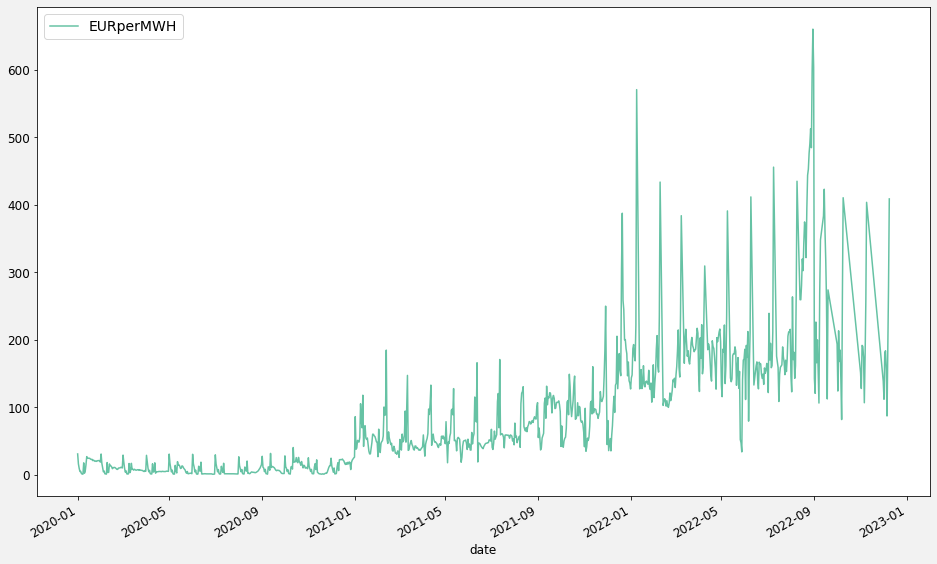

In [33]:
elpricesDF.loc[elpricesDF.zone=="NO1", :].plot(x="date", y="EURperMWH")

We might want to see more aggregated version of this data - so for example data that is aggregated to monthly averages. We can easily extract components from a date variable. 

Below we will extract month and year components from the date variable and create new variables from these components. The date components are within the attribute *dt*

In [39]:
elpricesDF["month"] = elpricesDF.date.dt.month
elpricesDF["year"] = elpricesDF.date.dt.year
elpricesDF

,date,zone,EURperMWH,month,year
0,2020-01-01,NO1,30.936250,1,2020
1,2020-01-01,NO2,30.936250,1,2020
2,2020-01-01,NO3,27.736667,1,2020
3,2020-01-01,NO4,27.736667,1,2020
4,2020-01-01,NO5,30.936250,1,2020
...,...,...,...,...,...
4960,2022-12-09,NO1,408.632500,12,2022
4961,2022-12-09,NO2,408.632500,12,2022
4962,2022-12-09,NO3,201.007500,12,2022
4963,2022-12-09,NO4,180.712917,12,2022


### A quick detour on working with text/"strings"

Before we go on, let us take a short detour on working with text, or "strings" as computer scientists call it.

As you may have noticed, we signify strings by using quotes ("text"). 

Python allows us to use the + operator to combine texts: 


In [45]:
sentence = "Hello" + ", " + "everyone"
sentence

'Hello, everyone'

When we have a string object, like the object *sentence* above, we can access many string tools. 

We can, for example replace all upper-case letters with lower-case letters

In [50]:
sentence.lower()

'hello, everyone'

We can also split the string using the *.rsplit()* function and specifying a character to split on, we return a list of words: 

In [52]:
sentence.rsplit(", ")

['Hello', 'everyone']

You can see all the available string functions in the [Python documentation](https://docs.python.org/3/library/stdtypes.html#string-methods)

We can also work easily with strings in Pandas. 

If we have a numerical value, we can transform it to strings using the *astype()* function. So for example, the year variable we just created

In [54]:
stringYear = elpricesDF.year.astype(str)
stringYear

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4960    2022
4961    2022
4962    2022
4963    2022
4964    2022
Name: year, Length: 4965, dtype: object

Notice that the year variable here is now type "object", which is to say object. We can apply string functions to all the elements in the series by using the *.str* attribute

for example, we can use the *slice()* function to extract a portion of string from a starting index upto a stopping point. So Let's say we want to shorten the year variable to be two-digit. We want to start at the index of 2 upto (but not including) the index of 4.

In [57]:
stringYear.str.slice(2,4)

0       20
1       20
2       20
3       20
4       20
        ..
4960    22
4961    22
4962    22
4963    22
4964    22
Name: year, Length: 4965, dtype: object

### Back to dates

Now that we have looked a bit at strings, we can continue with our work with dates. 

Let's say that we want to create a combined indicator for the month and year of an electricity price and we want to have it in a date-time format. 

To do this, we will convert the month and year variables to be strings and then add them together

In [58]:
elpricesDF["monthYear"] = elpricesDF.year.astype(str) + "-" + elpricesDF.month.astype(str)

In [59]:
elpricesDF["monthYear"] = pd.to_datetime(elpricesDF.monthYear, format="%Y-%m")

In [60]:
elpricesDF

,date,zone,EURperMWH,month,year,monthYear
0,2020-01-01,NO1,30.936250,1,2020,2020-01-01
1,2020-01-01,NO2,30.936250,1,2020,2020-01-01
2,2020-01-01,NO3,27.736667,1,2020,2020-01-01
3,2020-01-01,NO4,27.736667,1,2020,2020-01-01
4,2020-01-01,NO5,30.936250,1,2020,2020-01-01
...,...,...,...,...,...,...
4960,2022-12-09,NO1,408.632500,12,2022,2022-12-01
4961,2022-12-09,NO2,408.632500,12,2022,2022-12-01
4962,2022-12-09,NO3,201.007500,12,2022,2022-12-01
4963,2022-12-09,NO4,180.712917,12,2022,2022-12-01


Now we have a date variable for the month and year of a price. Notice that the first day of the month is automatically put into the date format. 

Now that we have a month-year indicator, we can aggregate up to monthly values by grouping by the zone and the month-year indicator, and then calculating the mean values. 

In [79]:
monthlyEl = elpricesDF.groupby(["zone", "monthYear"])["EURperMWH"].aggregate(np.mean)

In [80]:
monthlyEl = monthlyEl.reset_index()

In [82]:
monthlyEl

,zone,monthYear,EURperMWH
0,NO1,2020-01-01,17.172083
1,NO1,2020-02-01,10.064756
2,NO1,2020-03-01,7.915346
3,NO1,2020-04-01,6.752500
4,NO1,2020-05-01,8.095323
...,...,...,...
175,NO5,2022-08-01,348.290298
176,NO5,2022-09-01,241.356224
177,NO5,2022-10-01,194.374722
178,NO5,2022-11-01,197.544167


we can use pivot to create columns for each zone: 

In [84]:
monthlyEl.pivot(index="monthYear", columns="zone", values="EURperMWH")

zone,NO1,NO2,NO3,NO4,NO5
monthYear,,,,,
2020-01-01,17.172083,17.156142,16.998145,16.870067,17.172083
2020-02-01,10.064756,9.929713,11.621695,11.441940,10.077414
2020-03-01,7.915346,7.908730,8.107214,7.881569,7.917564
2020-04-01,6.752500,6.751069,6.841375,6.671000,6.747486
2020-05-01,8.095323,8.069960,9.548374,9.297944,8.083468
2020-06-01,4.678819,4.678819,5.284958,4.892278,4.667042
2020-07-01,4.537231,4.537231,5.508777,5.298602,4.526277
2020-08-01,6.812056,6.955806,8.754785,8.002164,6.553333
2020-09-01,8.254389,8.272292,7.598722,6.174667,8.119319


We could then also create a quick plot of prices for each of the price zones

<AxesSubplot:xlabel='monthYear'>

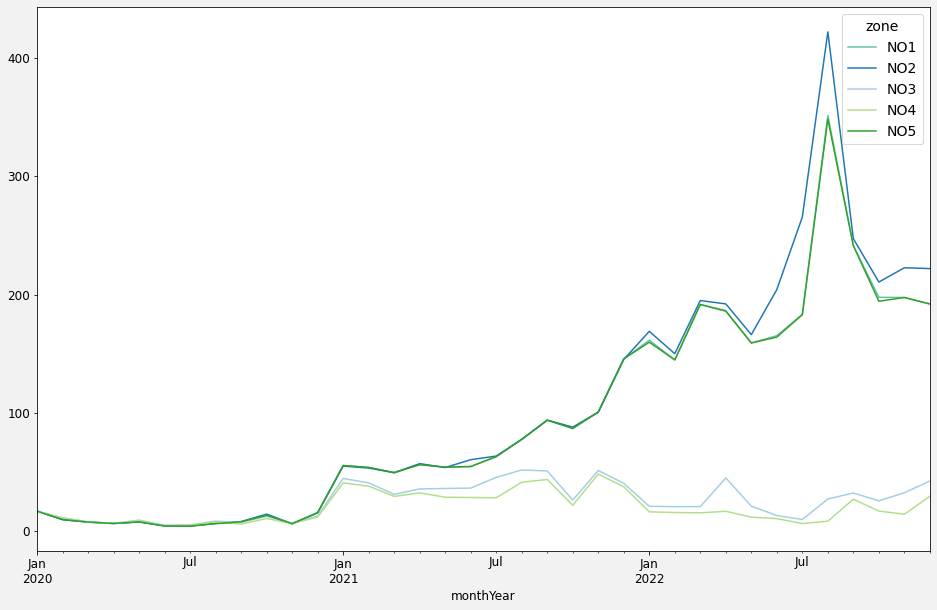

In [85]:
monthlyEl.pivot(index="monthYear", columns="zone", values="EURperMWH").plot()

### More dates and times

Now let's take a more challenging case. We will again download a dataset of electricity prices, but now at an hourly frequency: 

In [124]:
hourlyData = pd.read_csv("http://jmaurit.github.io/anv_statistikk/data/elprices_hourlyDF.csv")

In [125]:
hourlyData

,period,EURperMWH,zone
0,01.01.2020 00:00 - 01.01.2020 01:00,31.82,NO1
1,01.01.2020 01:00 - 01.01.2020 02:00,31.77,NO1
2,01.01.2020 02:00 - 01.01.2020 03:00,31.57,NO1
3,01.01.2020 03:00 - 01.01.2020 04:00,31.28,NO1
4,01.01.2020 04:00 - 01.01.2020 05:00,30.72,NO1
...,...,...,...
131530,31.12.2022 19:00 - 31.12.2022 20:00,NaN,NO5
131531,31.12.2022 20:00 - 31.12.2022 21:00,NaN,NO5
131532,31.12.2022 21:00 - 31.12.2022 22:00,NaN,NO5
131533,31.12.2022 22:00 - 31.12.2022 23:00,NaN,NO5


Here we see that the variable representing time, called "period", is in a non-standard format indicating a start and stop time for each our. 

To start, let's use the string function, *slice* to extract the first 17 characters of each string (basically consisting of the first part of the period). We put this in a new column called "time". 


In [126]:
hourlyData["time"] = hourlyData.period.str.slice(0,16)

potentially we also have used the function rsplit to create two seperate columns for the start and stop point of each period. Here we use the *expand=True* parameter so that two seperate columns are returned (instead of one colum of lists)

In [127]:
startStop = hourlyData.period.str.rsplit(" - ", expand=True)
startStop

,0,1
0,01.01.2020 00:00,01.01.2020 01:00
1,01.01.2020 01:00,01.01.2020 02:00
2,01.01.2020 02:00,01.01.2020 03:00
3,01.01.2020 03:00,01.01.2020 04:00
4,01.01.2020 04:00,01.01.2020 05:00
...,...,...
131530,31.12.2022 19:00,31.12.2022 20:00
131531,31.12.2022 20:00,31.12.2022 21:00
131532,31.12.2022 21:00,31.12.2022 22:00
131533,31.12.2022 22:00,31.12.2022 23:00


In [128]:
startStop.columns = ["start", "stop"]

Then we could combine with pd.concat

In [129]:
hourlyData = pd.concat([hourlyData, startStop], axis=1)

In [130]:
hourlyData

,period,EURperMWH,zone,time,start,stop
0,01.01.2020 00:00 - 01.01.2020 01:00,31.82,NO1,01.01.2020 00:00,01.01.2020 00:00,01.01.2020 01:00
1,01.01.2020 01:00 - 01.01.2020 02:00,31.77,NO1,01.01.2020 01:00,01.01.2020 01:00,01.01.2020 02:00
2,01.01.2020 02:00 - 01.01.2020 03:00,31.57,NO1,01.01.2020 02:00,01.01.2020 02:00,01.01.2020 03:00
3,01.01.2020 03:00 - 01.01.2020 04:00,31.28,NO1,01.01.2020 03:00,01.01.2020 03:00,01.01.2020 04:00
4,01.01.2020 04:00 - 01.01.2020 05:00,30.72,NO1,01.01.2020 04:00,01.01.2020 04:00,01.01.2020 05:00
...,...,...,...,...,...,...
131530,31.12.2022 19:00 - 31.12.2022 20:00,NaN,NO5,31.12.2022 19:00,31.12.2022 19:00,31.12.2022 20:00
131531,31.12.2022 20:00 - 31.12.2022 21:00,NaN,NO5,31.12.2022 20:00,31.12.2022 20:00,31.12.2022 21:00
131532,31.12.2022 21:00 - 31.12.2022 22:00,NaN,NO5,31.12.2022 21:00,31.12.2022 21:00,31.12.2022 22:00
131533,31.12.2022 22:00 - 31.12.2022 23:00,NaN,NO5,31.12.2022 22:00,31.12.2022 22:00,31.12.2022 23:00


In [131]:
hourlyData.dtypes

period        object
EURperMWH    float64
zone          object
time          object
start         object
stop          object
dtype: object

Looking at the datatypes, we would still need to convert our time variable(s)

In [132]:
hourlyData

,period,EURperMWH,zone,time,start,stop
0,01.01.2020 00:00 - 01.01.2020 01:00,31.82,NO1,01.01.2020 00:00,01.01.2020 00:00,01.01.2020 01:00
1,01.01.2020 01:00 - 01.01.2020 02:00,31.77,NO1,01.01.2020 01:00,01.01.2020 01:00,01.01.2020 02:00
2,01.01.2020 02:00 - 01.01.2020 03:00,31.57,NO1,01.01.2020 02:00,01.01.2020 02:00,01.01.2020 03:00
3,01.01.2020 03:00 - 01.01.2020 04:00,31.28,NO1,01.01.2020 03:00,01.01.2020 03:00,01.01.2020 04:00
4,01.01.2020 04:00 - 01.01.2020 05:00,30.72,NO1,01.01.2020 04:00,01.01.2020 04:00,01.01.2020 05:00
...,...,...,...,...,...,...
131530,31.12.2022 19:00 - 31.12.2022 20:00,NaN,NO5,31.12.2022 19:00,31.12.2022 19:00,31.12.2022 20:00
131531,31.12.2022 20:00 - 31.12.2022 21:00,NaN,NO5,31.12.2022 20:00,31.12.2022 20:00,31.12.2022 21:00
131532,31.12.2022 21:00 - 31.12.2022 22:00,NaN,NO5,31.12.2022 21:00,31.12.2022 21:00,31.12.2022 22:00
131533,31.12.2022 22:00 - 31.12.2022 23:00,NaN,NO5,31.12.2022 22:00,31.12.2022 22:00,31.12.2022 23:00


Here is one extract of the format of the data

In [133]:
hourlyData.time[0]

'01.01.2020 00:00'

In [134]:
hourlyData["time"] = pd.to_datetime(hourlyData.time, format="%d.%m.%Y %H:%M")


In [136]:
hourlyData.dtypes

period               object
EURperMWH           float64
zone                 object
time         datetime64[ns]
start                object
stop                 object
dtype: object

Now the time variable is in datetime format. We could extract the date from this variable and put that as its own variable

In [137]:
hourlyData["date"] = hourlyData.time.dt.date

### A simpler example

Let us end with a more straight-forward example. Here I will import data on [inflation directly from the FRED database](https://fred.stlouisfed.org/series/CORESTICKM159SFRBATL)

The image below shows how to get the link to the csv data - you would click on "copy link" in the pop-up menu. 

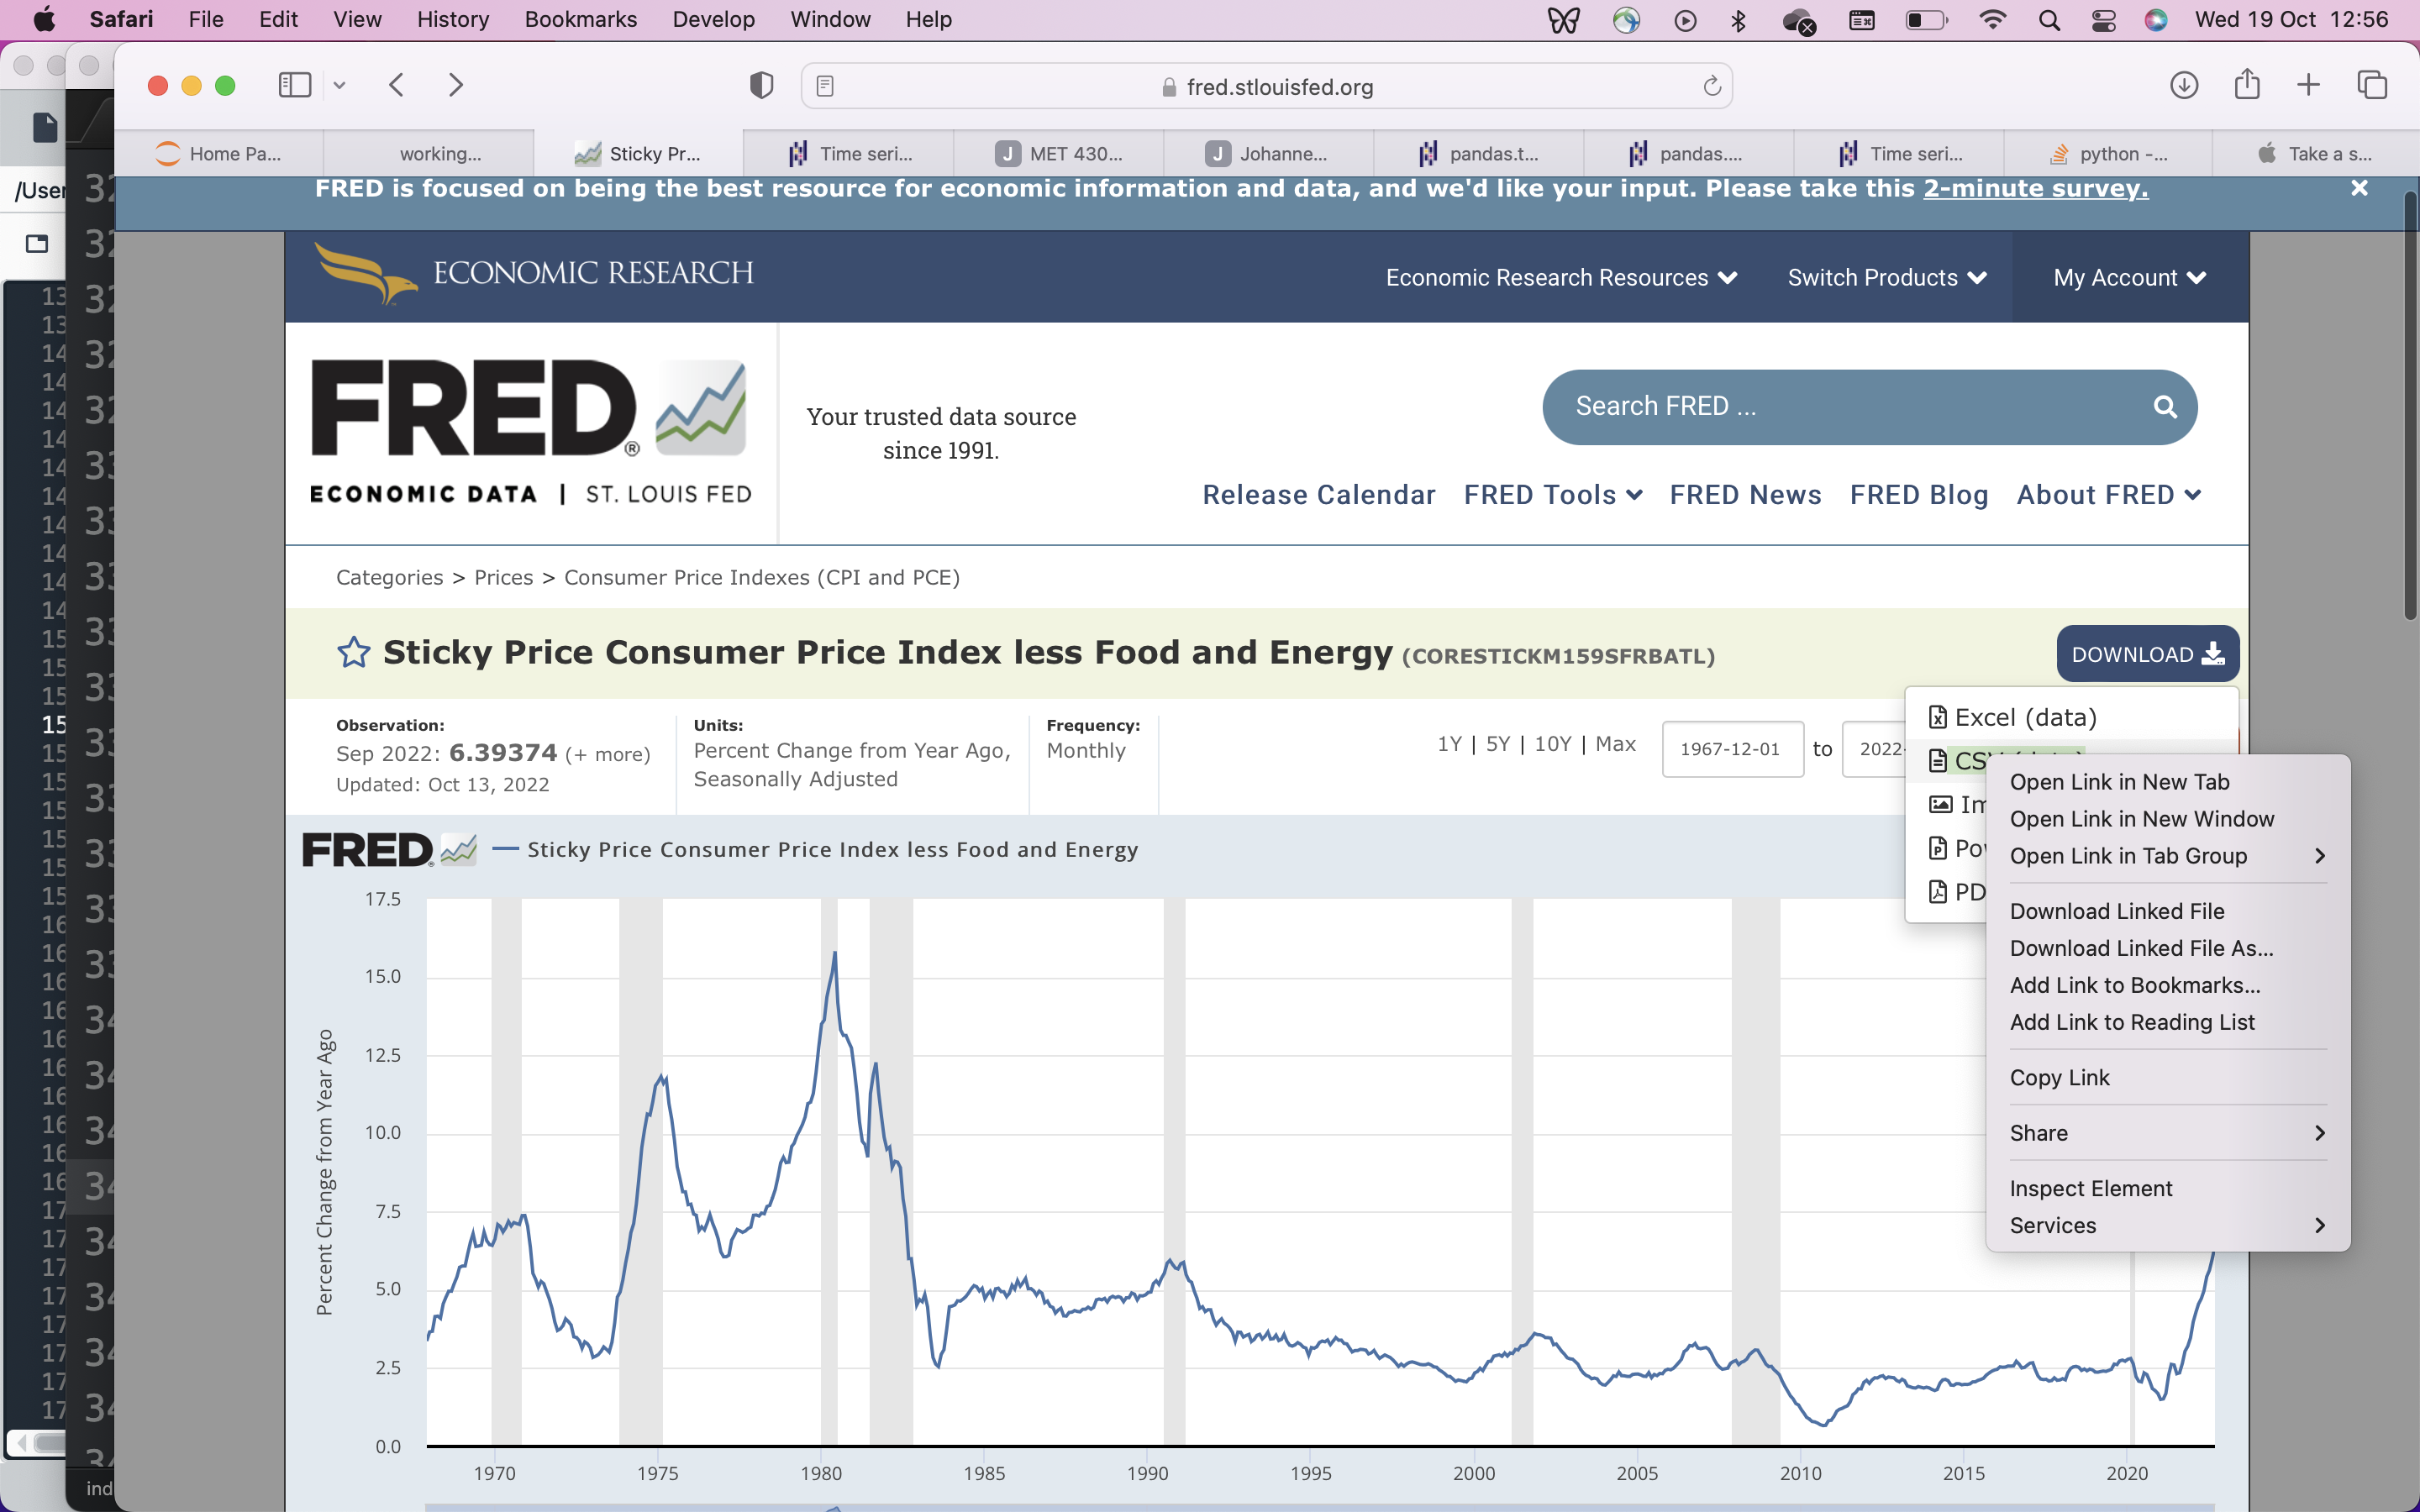

I copy the link url into a pd.read_csv() command: 

In [138]:
inflation = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CORESTICKM159SFRBATL&scale=left&cosd=1967-12-01&coed=2022-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-10-18&revision_date=2022-10-18&nd=1967-12-01")

In [139]:
inflation.dtypes

DATE                     object
CORESTICKM159SFRBATL    float64
dtype: object

I notice that the DATE variable is read in as text, but I can quickly use the pd.to_datetime() function to convert to datetime. The function automatically recognizes the format of the dates. 

In [140]:
inflation["DATE"] = pd.to_datetime(inflation.DATE)

<AxesSubplot:xlabel='DATE'>

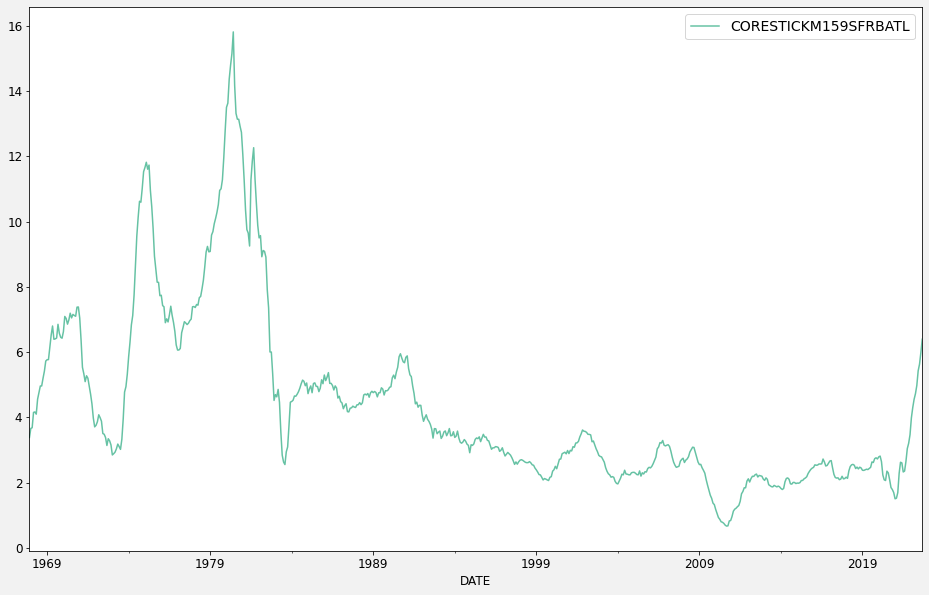

In [141]:
inflation.plot(x="DATE", y="CORESTICKM159SFRBATL")